# Speed dating

Le jeu de donnée étudié a été récupéré sur la plateforme [openml](https://www.openml.org/search?id=40536), il est également disponible sur [kaggle](https://www.kaggle.com/datasets/ulrikthygepedersen/speed-dating/data) au format csv, mais le fichier semble etre mal convertit.

Il a été constitué depuis les informations de participants a des évènements expérimentaux de speed-dating entre les années 2002 et 2004.

L'étiquette du jeu de donnée (colonne match) a été renseigné par rapport a la réponse à la question "Est-ce que vous seriez disposé a revoir la personne ?" après un premier rendez-vous de 4 minutes

Le jeu de donnée est composé de 123 colonnes

Les participants devaient remplir un questionaire pour déterminer leur profil puis noter leurs partenaire sur 6 critères :
- Attractivité
- Sincérité
- Intélligence
- Humour
- Ambitions
- Centre d'intérets partagés


Limites/biais
- Le jeu de donné n'est pas récent
- Les couples étaient exclusivement hétérosexués
- l'étiquette 'match' se base sur un entretiens cours et il n'y a pas d'informations sur les éventuelles suite dans les relations

## source

Description

Author: Ray Fisman and Sheena Iyengar
Source: Columbia Business School - 2004
Please cite: None

This data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four-minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests. The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information.
Attribute Information

 * gender: Gender of self  

 * age: Age of self  

 * age_o: Age of partner  

 * d_age: Difference in age  

 * race: Race of self  - retiré

 * race_o: Race of partner  - retiré

 * samerace: Whether the two persons have the same race or not.  - retiré

 * importance_same_race: How important is it that partner is of same race?  - retiré

 * importance_same_religion: How important is it that partner has same religion?  - retiré

 * field: Field of study  - retiré

 * pref_o_attractive: How important does partner rate attractiveness  

 * pref_o_sinsere: How important does partner rate sincerity  

 * pref_o_intelligence: How important does partner rate intelligence  

 * pref_o_funny: How important does partner rate being funny  

 * pref_o_ambitious: How important does partner rate ambition  

 * pref_o_shared_interests: How important does partner rate having shared interests  

 * attractive_o: Rating by partner (about me) at night of event on attractiveness  

 * sincere_o: Rating by partner (about me) at night of event on sincerity  

 * intelligence_o: Rating by partner (about me) at night of event on intelligence  

 * funny_o: Rating by partner (about me) at night of event on being funny  

 * ambitous_o: Rating by partner (about me) at night of event on being ambitious  

 * shared_interests_o: Rating by partner (about me) at night of event on shared interest  

 * attractive_important: What do you look for in a partner - attractiveness  

 * sincere_important: What do you look for in a partner - sincerity  

 * intellicence_important: What do you look for in a partner - intelligence  

 * funny_important: What do you look for in a partner - being funny  

 * ambtition_important: What do you look for in a partner - ambition  

 * shared_interests_important: What do you look for in a partner - shared interests  

 * attractive: Rate yourself - attractiveness  

 * sincere: Rate yourself - sincerity   

 * intelligence: Rate yourself - intelligence   

 * funny: Rate yourself - being funny   

 * ambition: Rate yourself - ambition  

 * attractive_partner: Rate your partner - attractiveness  - retrait

 * sincere_partner: Rate your partner - sincerity   - retrait

 * intelligence_partner: Rate your partner - intelligence   - retrait

 * funny_partner: Rate your partner - being funny   - retrait

 * ambition_partner: Rate your partner - ambition   - retrait

 * shared_interests_partner: Rate your partner - shared interests  - retrait

 * sports: Your own interests [1-10]  

 * tvsports  

 * exercise  

 * dining  

 * museums  

 * art  

 * hiking  

 * gaming  

 * clubbing  

 * reading  

 * tv  

 * theater  

 * movies  

 * concerts  

 * music  

 * shopping  

 * yoga  

 * interests_correlate: Correlation between participant’s and partner’s ratings of interests.  

 * expected_happy_with_sd_people: How happy do you expect to be with the people you meet during the speed-dating event?  - retiré

 * expected_num_interested_in_me: Out of the 20 people you will meet, how many do you expect will be interested in dating you?  - retiré

 * expected_num_matches: How many matches do you expect to get?  - retiré

 * like: Did you like your partner?  - retiré

 * guess_prob_liked: How likely do you think it is that your partner likes you?   - retiré

 * met: Have you met your partner before?  - retiré

 * decision: Decision at night of event.

 * decision_o: Decision of partner at night of event.  

 * match: Match (yes/no)

Relevant paper

Raymond Fisman; Sheena S. Iyengar; Emir Kamenica; Itamar Simonson.
Gender Differences in Mate Selection: Evidence From a Speed Dating Experiment.
The Quarterly Journal of Economics, Volume 121, Issue 2, 1 May 2006, Pages 673–697,
https://doi.org/10.1162/qjec.2006.121.2.673

# Analyse exploratoire des données

In [20]:
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.figure import Figure
from scipy.io.arff import MetaData, loadarff
from pandas import DataFrame, Series, crosstab
from numpy import ndarray
from numpy.random import shuffle
import numpy as np
import pandas as pd
from IPython.display import display, Markdown
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import seaborn as sns
import sys

EPSILON: float = sys.float_info.epsilon
NL='\n'

@pd.api.extensions.register_dataframe_accessor("custom")
class DescAccessor:
    def __init__(self, pandas_obj: DataFrame) -> None:
        self._df: DataFrame = pandas_obj

    def describe(self) -> DataFrame:
        df_describe: DataFrame = self._df.describe()
        df_describe.loc['missing'] = len(self._df) - df_describe.loc['count']
        df_feature_group_describe_index: list[str] = [*df_describe.index[0:1], 'missing', *df_describe.index[1:-1]]
        return df_describe.loc[df_feature_group_describe_index]

/tmp/ipykernel_144329/4242678201.py:18: UserWarning: registration of accessor <class '__main__.DescAccessor'> under name 'custom' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  @pd.api.extensions.register_dataframe_accessor("custom")


In [21]:
# Chargement du jeu de données
data: ndarray
meta: MetaData
data, meta = loadarff('speeddating.arff')

## Correction des types de données

Lors du chargement du jeu de donnée, on peut observer les 2 types de données possibles
- catégorielle / qualitative
- numérique / quantitative

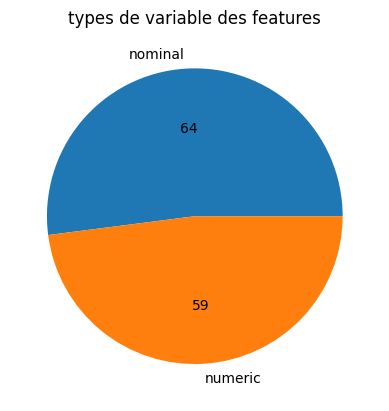

In [22]:
df_arff_types = DataFrame(meta.types())
df_arff_types_counts: Series = df_arff_types.groupby(0).size()
plt.title("types de variable des features")
plt.pie(
    df_arff_types_counts,
    labels=df_arff_types_counts.index.tolist(),
    autopct=lambda pct: f"{pct * len(df_arff_types) / 100:.0f}",
)
plt.show()


En parcourant les valeurs de la première ligne pour quelque colonnes, il apparait rapidement que :
- certaines données numérique/booleénne et les chaines de textes sont typés 'bytes'
- Toutes les autres données numérique sont typés 'float64'

In [23]:
df: DataFrame = DataFrame(data)

for col in df.columns[:10]:
    print(f"{col:<10}: {df[col][0]} {type(df[col][0])}")

df['has_null'].value_counts()

has_null  : b'0' <class 'bytes'>
wave      : 1.0 <class 'numpy.float64'>
gender    : b'female' <class 'bytes'>
age       : 21.0 <class 'numpy.float64'>
age_o     : 27.0 <class 'numpy.float64'>
d_age     : 6.0 <class 'numpy.float64'>
d_d_age   : b'[4-6]' <class 'bytes'>
race      : b'Asian/Pacific Islander/Asian-American' <class 'bytes'>
race_o    : b'European/Caucasian-American' <class 'bytes'>
samerace  : b'0' <class 'bytes'>


has_null
b'1'    7330
b'0'    1048
Name: count, dtype: int64

has_null  : 0 <class 'numpy.int64'>
wave      : 1.0 <class 'numpy.float64'>
gender    : female <class 'str'>
age       : 21.0 <class 'numpy.float64'>
age_o     : 27.0 <class 'numpy.float64'>
d_age     : 6.0 <class 'numpy.float64'>
d_d_age   : [4-6] <class 'str'>
race      : Asian/Pacific Islander/Asian-American <class 'str'>
race_o    : European/Caucasian-American <class 'str'>
samerace  : 0 <class 'numpy.int64'>


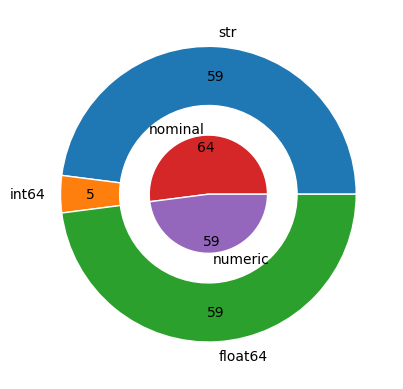

In [24]:
# Conversion des colonnes
for col in df.select_dtypes([object]):
    try:
        df[col] = df[col].astype(int)
    except:
        try:
            df[col] = df[col].astype(float)
        except:
            df[col] = df[col].astype(str)

for col in df.columns[:10]:
    print(f"{col:<10}: {df[col][0]} {type(df[col][0])}")

# Récupération des types redéfinis sur le dataframe
df_types_counts: Series = df.dtypes.replace('object', 'str').value_counts(dropna=False)
df_types_counts.sort_index(inplace=True, key=lambda k: k == float) # float en premier pour aligner les diagrammes

# nombre total de caractéristiques
features_count = len(df.columns)

# Comparaison du graphe de répartition des types
plt.pie(
    df_types_counts,
    labels=df_types_counts.index.tolist(),
    startangle=0,
    autopct=lambda pct: f"{pct * features_count / 100:.0f}",
    pctdistance=0.8,
    radius=1,
    wedgeprops=dict(width=0.4, edgecolor='w'),
)

plt.pie(
    df_arff_types_counts,
    labels=df_arff_types_counts.index.tolist(),
    startangle=0,
    autopct=lambda pct: f"{pct * features_count / 100:.0f}",
    pctdistance=0.8,
    radius=0.4,
    wedgeprops=dict(width=0.4, edgecolor='w'),
)

plt.show()

## Exploration des caractéristiques

In [25]:
cols: int = 5
rows: int = 25

feature_columns_list: list[str] = df.columns.tolist()
feature_columns_list += (rows*cols - len(feature_columns_list)) * [""]
feature_columns: ndarray = np.reshape(feature_columns_list, (cols,rows)).T

df_fulfilled_feature: DataFrame = df[df.columns[df.count() == len(df)]]
fulfilled_feature_columns_list: list[str] = df_fulfilled_feature.columns.tolist()
columns_size: list[int] = np.apply_along_axis(lambda x: len(max(x, key=lambda x: len(x))), axis=0, arr=feature_columns).tolist()

print("Liste des caractéristiques:\n- '✗' si au moins une valeur est manquante \n- '✓' si aucune valeur manquante\n")

for i, row in enumerate(feature_columns):
    for j, feature in enumerate(row):
        if feature == "": continue
        print(f"{feature:<{columns_size[j]}} {'✓  ' if feature in fulfilled_feature_columns_list else '  ✗'} | ", end="")
    print()


Liste des caractéristiques:
- '✗' si au moins une valeur est manquante 
- '✓' si aucune valeur manquante

has_null                   ✓   | d_pref_o_ambitious         ✓   | d_shared_interests_important ✓   | exercise     ✗ | d_tv                            ✓   | 
wave                       ✓   | d_pref_o_shared_interests  ✓   | attractive                     ✗ | dining       ✗ | d_theater                       ✓   | 
gender                     ✓   | attractive_o                 ✗ | sincere                        ✗ | museums      ✗ | d_movies                        ✓   | 
age                          ✗ | sinsere_o                    ✗ | intelligence                   ✗ | art          ✗ | d_concerts                      ✓   | 
age_o                        ✗ | intelligence_o               ✗ | funny                          ✗ | hiking       ✗ | d_music                         ✓   | 
d_age                      ✓   | funny_o                      ✗ | ambition                       ✗ | gaming  

In [26]:
# suppression de la colonne has_null
df.drop(columns=['has_null'], inplace=True)

# Par cohérence ou pour corriger des typos, on renomme quelques colonnes
df.rename(
    columns={
        'sinsere_o': 'sincere_o',
        'd_sinsere_o': 'd_sincere_o',
        'intellicence_important': 'intelligence_important',
        'd_intellicence_important': 'd_intelligence_important',
        'ambition': 'ambitious',
        'd_ambition': 'd_ambitious',
        'ambtition_important': 'ambitious_important',
        'd_ambtition_important': 'd_ambitious_important',
        'ambition_partner': 'ambitious_partner',
        'd_ambition_partner': 'd_ambitious_partner',
        'ambitous_o': 'ambitious_o',
        'd_ambitous_o': 'd_ambitious_o'
    },
    inplace=True
)

Dans la liste des caractéristiques on remarque que beaucoup de feature sont préfixées avec 'd_' qui semble indiquer des version discrétisées des features associées

In [27]:
# Fonction utilitaire pour trier les catégories dans l'ordre numérique de l'intervalle de la catégorie plutot que l'ordre alpha
MINUS_VALUE = -99.
def sorted_categories_as_intervals(df: DataFrame, d_feature_name: str) -> list[str]:
    d_feature_categories: list[str] = df[d_feature_name].unique().tolist()
    d_feature_categories_float_index: list[tuple[list[float], str]] = [([float(v) if len(v) > 0 else MINUS_VALUE for v in c[1:-1].split('-')], c) for c in d_feature_categories]
    d_feature_categories_interval_key_tuple: list[tuple[tuple[float, float], str]] = []
    for v, k in d_feature_categories_float_index:
        interval_key_tuple: tuple[tuple[float, float], str]
        if len(v) > 3:
            interval_key_tuple = ((-v[1], -v[3]), k)
        elif len(v) > 2:
            interval_key_tuple = ((-v[1], v[2]), k) if v[0] == MINUS_VALUE else ((v[0], -v[2]), k)
        elif len(v) == 2:
            interval_key_tuple = ((v[0], v[1]), k)
        else:
            raise ValueError()
        d_feature_categories_interval_key_tuple.append(interval_key_tuple)
    return [k for _, k in sorted(d_feature_categories_interval_key_tuple)]

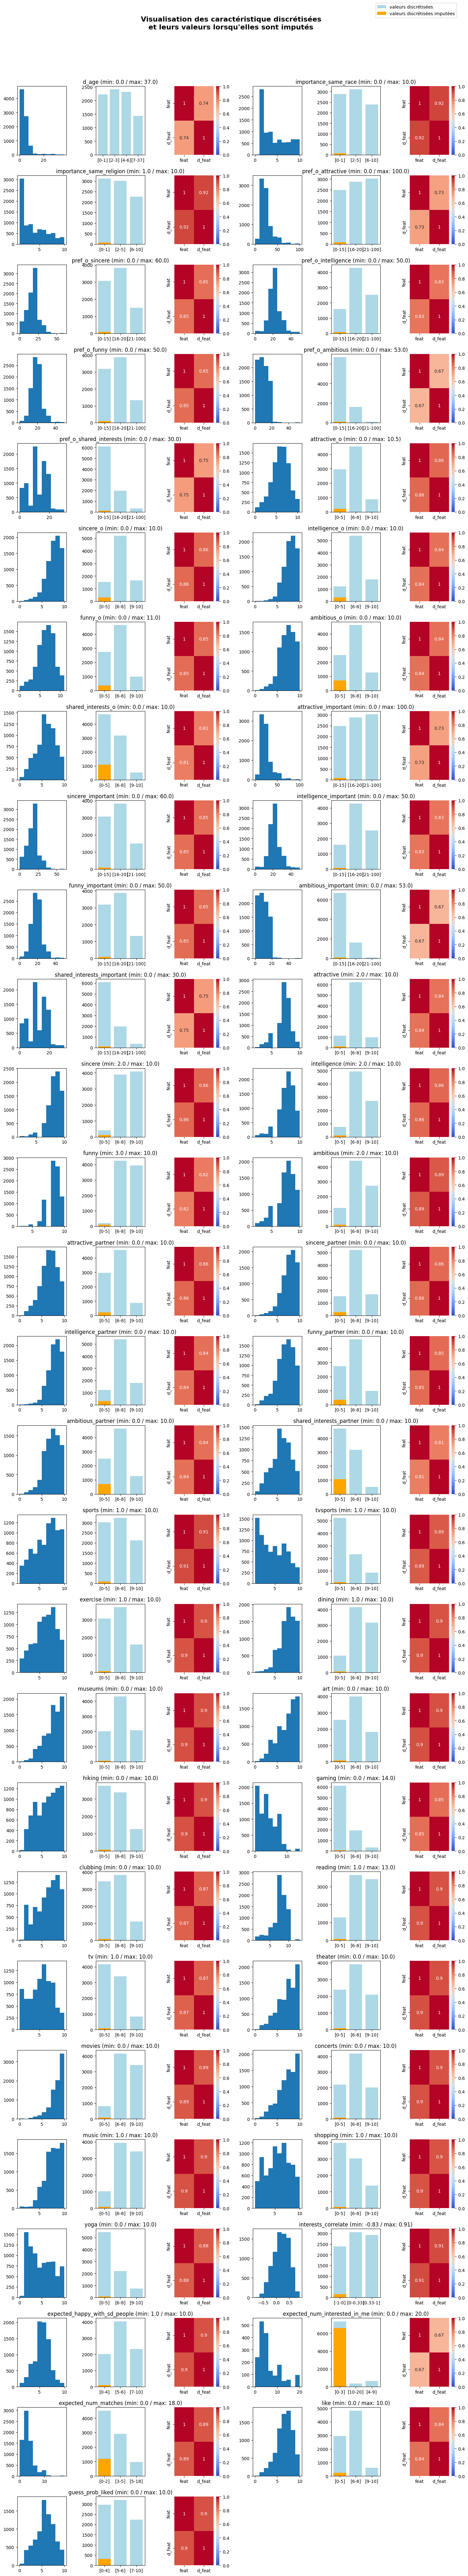

In [28]:

d_feature_names: list[str] = [c for c in df.columns if c not in ['d_age'] and c.startswith('d_')]

plots_feat_per_rows = 2
plots_rows = int((len(d_feature_names) / plots_feat_per_rows + 1 - 0.0001))

fig: Figure
all_axes: ndarray
fig, all_axes = plt.subplots(plots_rows, 3 * plots_feat_per_rows, figsize=(18, 90))
all_axes = all_axes.flatten()

for ax in all_axes:
    ax.set_visible(False)

for i, d_feature_name in enumerate(d_feature_names):
    i_feat = 3 * i
    i_d_feature = i_feat + 1
    i_corr = i_feat + 2
    feat_name: str = d_feature_name[2:]
    na_feat_d_features_df: DataFrame = df[df[feat_name].isna()][[d_feature_name]]
    na_feat_d_feature_unique_values: list[str] = na_feat_d_features_df[d_feature_name].unique().tolist()
    d_feature_possible_values: list[str] = sorted(df[d_feature_name].unique().tolist())

    all_d_feature_value_counts: Series = df[d_feature_name].value_counts().sort_index()
    na_feat_d_features_value_counts: Series = na_feat_d_features_df[d_feature_name].value_counts()

    # Diagramme en barre - dénombrement des classes
    all_axes[i_d_feature].set_visible(True)
    all_axes[i_d_feature].bar(
        all_d_feature_value_counts.index,
        height=all_d_feature_value_counts,
        color="lightblue",
        label="valeurs discrétisées"
    )
    all_axes[i_d_feature].bar(
        na_feat_d_features_value_counts.index,
        height=na_feat_d_features_value_counts,
        color="orange",
        label="valeurs discrétisées imputées"
    )
    all_axes[i_d_feature].set_title(f"{feat_name} (min: {round(df[feat_name].min(),2)} / max: {round(df[feat_name].max(),2)})")

    # Histogramme - distribution des valeurs
    all_axes[i_feat].set_visible(True)
    all_axes[i_feat].hist(
        df[feat_name],
        bins=10
    )

    # Heatmap - correlation entre classes et valeurs
    d_feature_categories: list[str] = sorted_categories_as_intervals(df, d_feature_name)
    encoder: LabelEncoder = LabelEncoder().fit(d_feature_categories)
    feat_encoded_mat = encoder.transform(df[d_feature_name])
    feat_encoded_df: DataFrame = df[[feat_name]].fillna(0)
    feat_encoded_df[d_feature_name] = feat_encoded_mat
    feat_encoded_df.rename(columns={feat_name: 'feat', d_feature_name: 'd_feat'}, inplace=True)
    corr_df: DataFrame = feat_encoded_df.corr()

    all_axes[i_corr].set_visible(True)
    sns.heatmap(corr_df, annot=True, ax=all_axes[i_corr], vmin=0, cmap='coolwarm')


handles, labels = all_axes[4].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.90,1.01), fontsize=10)
fig.text(0.5, 1, "Visualisation des caractéristique discrétisées\net leurs valeurs lorsqu'elles sont imputés", ha='center', fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.98, wspace=0.6, hspace=0.3)
plt.show()


In [29]:
final_column_list: list[str] = df.columns.difference(d_feature_names).tolist()

display(Markdown(
f"""On remarque a l'aide des matrices de confusion, même si ce n'est pas mentionné dans les sources,\
 que les colonnes préfixées 'd_' sont bien les version discrétisées de leurs équivalent non préfixés.

On retire donc ces colonnes pour conserver a ce stade {len(final_column_list)}
"""))

On remarque a l'aide des matrices de confusion, même si ce n'est pas mentionné dans les sources, que les colonnes préfixées 'd_' sont bien les version discrétisées de leurs équivalent non préfixés.

On retire donc ces colonnes pour conserver a ce stade 67


---

Quelques constats sur les autres valeurs visible sur les graphes précédents

In [30]:
# Il y a trop de valeurs manquante pour conserver la colonne 'expected_num_interested_in_me'

df.drop(columns=['expected_num_interested_in_me'], inplace=True)
final_column_list.remove('expected_num_interested_in_me')

In [31]:
display(Markdown(
f"""
On constate sur les graphe précédents, que les activités 'gaming' et 'reading' ont des valeurs max supèrieures a 10,
Si on regarde en détail on remarque que toutes ces valeurs sont unique respectivement a 14 et 13 :  
                 
{df[df['gaming'] > 10]['gaming'].value_counts().to_markdown()}  

{df[df['reading'] > 10]['reading'].value_counts().to_markdown()}  

Les valeurs seront ramené a 10 pour conserver l'échelle de notation précisé sur les activités
"""))


On constate sur les graphe précédents, que les activités 'gaming' et 'reading' ont des valeurs max supèrieures a 10,
Si on regarde en détail on remarque que toutes ces valeurs sont unique respectivement a 14 et 13 :  

|   gaming |   count |
|---------:|--------:|
|       14 |      78 |  

|   reading |   count |
|----------:|--------:|
|        13 |      51 |  

Les valeurs seront ramené a 10 pour conserver l'échelle de notation précisé sur les activités


In [32]:
df_age: DataFrame = df.copy()[['age', 'age_o', 'd_age']]

display(Markdown(
f"""
{df_age.custom.describe().to_markdown()}

exemples de valeurs ou 'age' est présent mais 'age_o' n'est pas renseigné
{df_age.loc[df_age['age'].isna() & df_age['age_o'].notna()].head(5).to_markdown()}

exemples de valeurs ou 'age_o' est présent mais 'age' n'est pas renseigné
{df_age.loc[df_age['age'].notna() & df_age['age_o'].isna()].head(5).to_markdown()}

Avec {len(df_age.loc[df_age['age'].isna() & df_age['age_o'].notna() & (df_age['age_o'] == df_age['d_age'])])} ligne ou 'd_age' == 'age_o' lorsque 'age' est null  
Avec {len(df_age.loc[df_age['age'].notna() & df_age['age_o'].isna() & (df_age['age'] == df_age['d_age'])])} ligne ou 'd_age' == 'age' lorsque 'age_o' est null  
Et {len(df_age.loc[df_age['age'].isna() & df_age['age_o'].isna()])} ligne ou il manque les 2 et 'd_age' est a 0  

La différence d'age sera corrigé pour être définie a la valeur moyenne
Pour éviter de faire matcher des mineurs avec des adultes, la différence d'age moyenne sera toujours ajoutée a la valeur manquante
"""))


df_age.loc[df_age['age_o'].isna() & df_age['age'].notna(), 'd_age'] = float('nan')
df_age.loc[df_age['age_o'].notna() & df_age['age'].isna(), 'd_age'] = float('nan')
df_age.loc[df_age['age_o'].isna() & df_age['age'].isna(), 'd_age'] = float('nan')

mean_d_age: float = df_age['d_age'].describe()['mean']
df_age.loc[df_age['d_age'].isna(), 'd_age'] = mean_d_age

df_age.loc[df_age['age_o'].isna() & df_age['age'].notna(), 'age_o'] = df_age['age'] + df_age['d_age']
df_age.loc[df_age['age_o'].notna() & df_age['age'].isna(), 'age'] = df_age['age_o'] + df_age['d_age']

df_age.loc[df_age['age_o'].isna() & df_age['age'].isna(), ['age', 'age_o']] = [df_age['age'].describe()['mean'], df_age['age'].describe()['mean'] + mean_d_age]

display(Markdown(
f"""
On constate après modifications que les valeurs pour 'age' et 'age_o' ont peu variée, et les valeurs de 'd_age' ont été corrigé, avec un moyenne recalculé sans les valeurs abberantes
{df_age[['age', 'age_o', 'd_age']].custom.describe().to_markdown()}
"""))


|         |        age |      age_o |      d_age |
|:--------|-----------:|-----------:|-----------:|
| count   | 8283       | 8274       | 8378       |
| missing |   95       |  104       |    0       |
| mean    |   26.3589  |   26.365   |    4.18561 |
| std     |    3.56676 |    3.56365 |    4.59617 |
| min     |   18       |   18       |    0       |
| 25%     |   24       |   24       |    1       |
| 50%     |   26       |   26       |    3       |
| 75%     |   28       |   28       |    5       |
| max     |   55       |   55       |   37       |

exemples de valeurs ou 'age' est présent mais 'age_o' n'est pas renseigné
|     |   age |   age_o |   d_age |
|----:|------:|--------:|--------:|
| 828 |   nan |      29 |      29 |
| 829 |   nan |      22 |      22 |
| 830 |   nan |      27 |      27 |
| 831 |   nan |      28 |      28 |
| 832 |   nan |      26 |      26 |

exemples de valeurs ou 'age_o' est présent mais 'age' n'est pas renseigné
|     |   age |   age_o |   d_age |
|----:|------:|--------:|--------:|
| 910 |    29 |     nan |      29 |
| 911 |    29 |     nan |      29 |
| 920 |    22 |     nan |      22 |
| 921 |    22 |     nan |      22 |
| 930 |    27 |     nan |      27 |

Avec 94 ligne ou 'd_age' == 'age_o' lorsque 'age' est null  
Avec 103 ligne ou 'd_age' == 'age' lorsque 'age_o' est null  
Et 1 ligne ou il manque les 2 et 'd_age' est a 0  

La différence d'age sera corrigé pour être définie a la valeur moyenne
Pour éviter de faire matcher des mineurs avec des adultes, la différence d'age moyenne sera toujours ajoutée a la valeur manquante



On constate après modifications que les valeurs pour 'age' et 'age_o' ont peu variée, et les valeurs de 'd_age' ont été corrigé, avec un moyenne recalculé sans les valeurs abberantes
|         |        age |     age_o |      d_age |
|:--------|-----------:|----------:|-----------:|
| count   | 8378       | 8378      | 8378       |
| missing |    0       |    0      |    0       |
| mean    |   26.3999  |   26.4043 |    3.65844 |
| std     |    3.59373 |    3.5898 |    3.02462 |
| min     |   18       |   18      |    0       |
| 25%     |   24       |   24      |    1       |
| 50%     |   26       |   26      |    3       |
| 75%     |   28       |   28      |    5       |
| max     |   55       |   55      |   32       |


---

In [33]:
categoricals_df: DataFrame = df[final_column_list].select_dtypes(object)
categorical_feature_names: list[str] = categoricals_df.columns.tolist()

display(Markdown(
f"""
Il reste, après suppression des colonnes discrétisées, {len(categorical_feature_names)} colonnes qualitatives
- {f"{NL}- ".join([f"{c} (avec {nan} valeur manquante)" for c, nan in df[categorical_feature_names].isna().sum(axis=0).items()])}
"""))


Il reste, après suppression des colonnes discrétisées, 4 colonnes qualitatives
- field (avec 0 valeur manquante)
- gender (avec 0 valeur manquante)
- race (avec 0 valeur manquante)
- race_o (avec 0 valeur manquante)


In [34]:
gender_unique_values: list[tuple[str, int]] = df['gender'].value_counts().items() # type: ignore

display(Markdown(
f"""Pour le genre les valeurs unique sont :
- {f"{NL}- ".join([f"{c} x {count}" for c, count in gender_unique_values])}

Ces colonnes seront encodé en one-hot
"""))

Pour le genre les valeurs unique sont :
- male x 4194
- female x 4184

Ces colonnes seront encodé en one-hot


In [35]:
race_list: list[str] = df['race'].unique().tolist()
race_o_list: list[str] = df['race_o'].unique().tolist()
race_unique_values: list[tuple[str, int]] = [tup for tup in df['race'].value_counts().items()] # type: ignore

df['race'] = df['race'].replace('?', 'Other')
df['race_o'] = df['race_o'].replace('?', 'Other')

race_list_cleaned: list[str] = df['race'].unique().tolist()
race_o_list_cleaned: list[str] = df['race_o'].unique().tolist()
race_cleaned_unique_values: list[tuple[str, int]] = [tup for tup in df['race'].value_counts().items()] # type: ignore

display(Markdown(
f"""
Pour l'origine ethnique on a 2 colonnes 'race' et 'race_o'
Ces colonnes ont {len([r for r in race_list if r not in race_o_list])} valeur différente
- {f"{NL}- ".join([f"{c} x {count}" for c, count in race_unique_values])}

On note cependant '?' et 'Other' qui se recoupent on merge donc les 2 types de données
Après ce traitement les colonnes ont {len([r for r in race_list_cleaned if r not in race_o_list_cleaned])} valeur différente
- {f"{NL}- ".join([f"{c} x {count}" for c, count in race_cleaned_unique_values])}
"""))


Pour l'origine ethnique on a 2 colonnes 'race' et 'race_o'
Ces colonnes ont 0 valeur différente
- European/Caucasian-American x 4727
- Asian/Pacific Islander/Asian-American x 1982
- Latino/Hispanic American x 664
- Other x 522
- Black/African American x 420
- ? x 63

On note cependant '?' et 'Other' qui se recoupent on merge donc les 2 types de données
Après ce traitement les colonnes ont 0 valeur différente
- European/Caucasian-American x 4727
- Asian/Pacific Islander/Asian-American x 1982
- Latino/Hispanic American x 664
- Other x 585
- Black/African American x 420


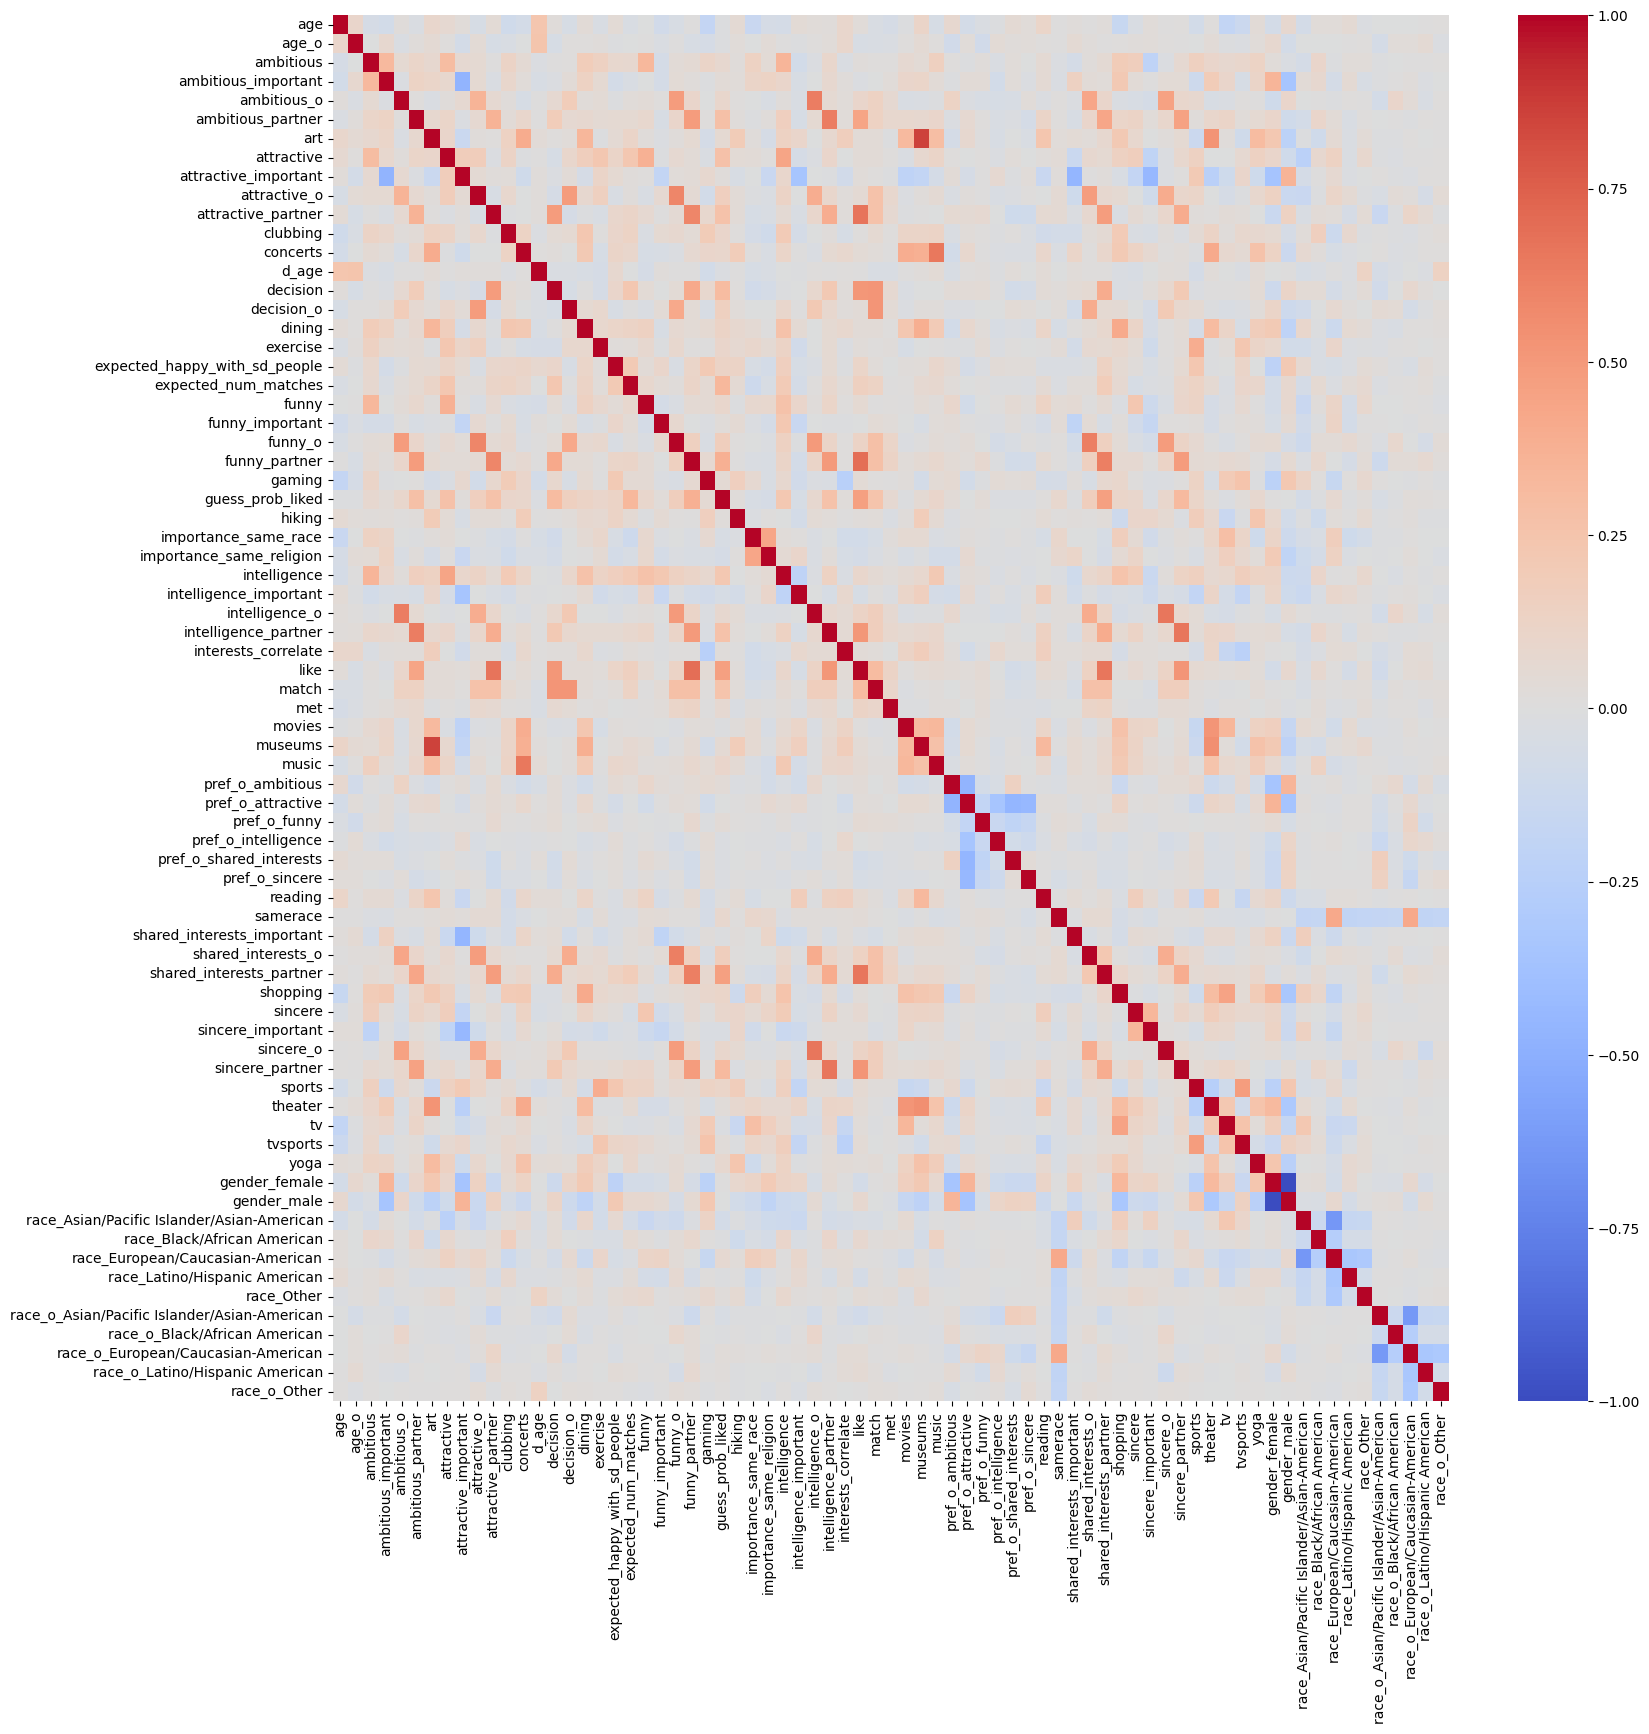

In [ ]:
# retraits des colonnes non utile et affichage de la matrice de correlation
import seaborn as sns


# la colonne 'expected_num_interested_in_me' a trop de valeur manquante pour etre utilisable
# la colonne 'field' ne semble a prior pas avoir d'importance pour le match
# la colonne 'wave' n'est pas décrite dans le set, d'après les disucussions sur kaggle il s'agirait d'un numéro de vague de participants
final_column_list: list[str] = df.columns.difference([*d_feature_names, 'expected_num_interested_in_me', 'field', 'wave']).tolist()
df_clean = df[final_column_list].copy()
ohe: OneHotEncoder = OneHotEncoder(sparse_output=False).fit(df[['gender', 'race', 'race_o']])
df_clean.loc[:,ohe.get_feature_names_out(['gender', 'race', 'race_o']).tolist()] = ohe.transform(df[['gender', 'race', 'race_o']])
df_clean.drop(columns=['gender', 'race', 'race_o'], inplace=True)

corr: DataFrame = df_clean.corr()
corr.fillna(0, inplace=True)

plt.figure(figsize=(18, 18))
axes: Axes = plt.subplot()
sns.heatmap(corr, annot=False, ax=axes, cmap='coolwarm')
plt.show()


On regarde dans la matrice de correlation les correlation dont |valeur| > 0.7
En dehors du genre on constate que les amateurs d'arts et de musées se recoupent, on peut donc retirer la colonnes 'musée' du jeu de donnée


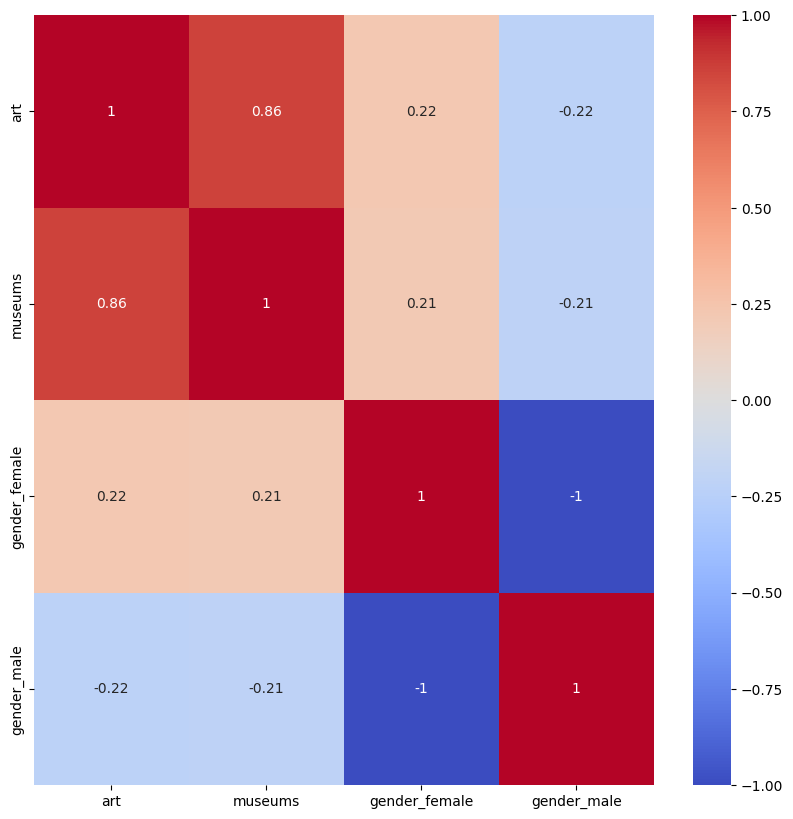

In [37]:
filter_lambda = lambda v: (abs(v) > 0.7) & (v != 1)
corr_mask = corr.apply(filter_lambda)
corr_mask = corr.loc[
    corr.apply(filter_lambda).any(axis=0),
    corr.apply(filter_lambda).any(axis=1)
]

display(Markdown(
f"""
On regarde dans la matrice de correlation les correlation dont |valeur| > 0.7
En dehors du genre on constate que les amateurs d'arts et de musées se recoupent, on peut donc retirer la colonnes 'musée' du jeu de donnée
"""
))

plt.figure(figsize=(10,10))
axes: Axes = plt.subplot()
sns.heatmap(round(corr_mask,3), annot=True, ax=axes, cmap='coolwarm')
plt.show()

final_column_list.remove('museums')

In [38]:
display(Markdown(
f"""
Liste des colonnes {len(final_column_list)} conservées
- {f"{NL}- ".join(final_column_list)}

`['{f"', '".join(final_column_list)}']`
"""))


Liste des colonnes 63 conservées
- age
- age_o
- ambitious
- ambitious_important
- ambitious_o
- ambitious_partner
- art
- attractive
- attractive_important
- attractive_o
- attractive_partner
- clubbing
- concerts
- d_age
- decision
- decision_o
- dining
- exercise
- expected_happy_with_sd_people
- expected_num_matches
- funny
- funny_important
- funny_o
- funny_partner
- gaming
- gender
- guess_prob_liked
- hiking
- importance_same_race
- importance_same_religion
- intelligence
- intelligence_important
- intelligence_o
- intelligence_partner
- interests_correlate
- like
- match
- met
- movies
- music
- pref_o_ambitious
- pref_o_attractive
- pref_o_funny
- pref_o_intelligence
- pref_o_shared_interests
- pref_o_sincere
- race
- race_o
- reading
- samerace
- shared_interests_important
- shared_interests_o
- shared_interests_partner
- shopping
- sincere
- sincere_important
- sincere_o
- sincere_partner
- sports
- theater
- tv
- tvsports
- yoga

`['age', 'age_o', 'ambitious', 'ambitious_important', 'ambitious_o', 'ambitious_partner', 'art', 'attractive', 'attractive_important', 'attractive_o', 'attractive_partner', 'clubbing', 'concerts', 'd_age', 'decision', 'decision_o', 'dining', 'exercise', 'expected_happy_with_sd_people', 'expected_num_matches', 'funny', 'funny_important', 'funny_o', 'funny_partner', 'gaming', 'gender', 'guess_prob_liked', 'hiking', 'importance_same_race', 'importance_same_religion', 'intelligence', 'intelligence_important', 'intelligence_o', 'intelligence_partner', 'interests_correlate', 'like', 'match', 'met', 'movies', 'music', 'pref_o_ambitious', 'pref_o_attractive', 'pref_o_funny', 'pref_o_intelligence', 'pref_o_shared_interests', 'pref_o_sincere', 'race', 'race_o', 'reading', 'samerace', 'shared_interests_important', 'shared_interests_o', 'shared_interests_partner', 'shopping', 'sincere', 'sincere_important', 'sincere_o', 'sincere_partner', 'sports', 'theater', 'tv', 'tvsports', 'yoga']`
